# Import Libraries

In [55]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import Binarizer
warnings.filterwarnings('ignore')

#  Data Preparation


In [2]:
data = pd.read_excel('Pre-processed ML Model Data.xlsx')
data.head()

,Data Type,Date,Campaign Name,Ad Group Name,Ad Name,Placement Name,Region,Country,Publisher,Channel,...,Clicks,CTR,CPC,Cost Per Lead,Registrations,CPR,Ref Tag,All Visits,Quality Visits Total,CPQV
0,Front-end,2024-10-16,B24MARKETING-CAMPAIGN14US1_MARKETING-CAMPAIGN_...,P2TK0VD - ABM ENT Q4 2024 - Native - Mobile - CPM,B24MARKETING-CAMPAIGN14US1_MARKETING-CAMPAIGN_...,P2TK0VD - NAT DIS - ABM ENT - Industrial - CPM...,NaN,US,Adobe DSP,Programmatic,...,5.0,0.000831,12.613799,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,Front-end,2024-10-16,B24MARKETING-CAMPAIGN14US1_MARKETING-CAMPAIGN_...,P2TK0VD - ABM ENT Q4 2024 - Native - Mobile - CPA,B24MARKETING-CAMPAIGN14US1_MARKETING-CAMPAIGN_...,P2TK0VD - NAT DIS - ABM ENT - Financial - CPA ...,NaN,US,Adobe DSP,Programmatic,...,5.0,0.625000,0.013117,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,Front-end,2024-10-16,B24MARKETING-CAMPAIGN14US1_MARKETING-CAMPAIGN_...,P2TK0VD - ABM ENT Q4 2024 - Native - Mobile - CPA,B24MARKETING-CAMPAIGN14US1_MARKETING-CAMPAIGN_...,P2TK0VD - NAT DIS - ABM ENT - Industrial - CPA...,NaN,US,Adobe DSP,Programmatic,...,8.0,0.001325,7.917723,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,Front-end,2024-10-16,B24MARKETING-CAMPAIGN14US1_MARKETING-CAMPAIGN_...,P2TK0VD - ABM ENT Q4 2024 - Native - Mobile - CPM,B24MARKETING-CAMPAIGN14US1_MARKETING-CAMPAIGN_...,P2TK0VD - NAT DIS - ABM ENT - Financial - CPM ...,NaN,US,Adobe DSP,Programmatic,...,8.0,0.001339,7.870678,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,Front-end,2024-10-16,B24MARKETING-CAMPAIGN14US1_MARKETING-CAMPAIGN_...,P2TK0VD - ABM ENT Q4 2024 - Native - Desktop -...,B24MARKETING-CAMPAIGN14US1_MARKETING-CAMPAIGN_...,P2TK0VD - NAT DIS - ABM ENT - Industrial - CPM...,NaN,US,Adobe DSP,Programmatic,...,1.0,0.250000,0.043032,NaN,2.0,0.021516,NaN,NaN,NaN,NaN


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37587 entries, 0 to 37586
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Data Type              37587 non-null  object        
 1   Date                   37587 non-null  datetime64[ns]
 2   Campaign Name          37587 non-null  object        
 3   Ad Group Name          859 non-null    object        
 4   Ad Name                1058 non-null   object        
 5   Placement Name         697 non-null    object        
 6   Region                 0 non-null      float64       
 7   Country                37587 non-null  object        
 8   Publisher              37587 non-null  object        
 9   Channel                37587 non-null  object        
 10  Targeting              1041 non-null   object        
 11  Ad Type                37587 non-null  object        
 12  Ad Size                879 non-null    object        
 13  A

In [4]:
data.columns


Index(['Data Type', 'Date', 'Campaign Name', 'Ad Group Name', 'Ad Name',
       'Placement Name', 'Region', 'Country', 'Publisher', 'Channel',
       'Targeting', 'Ad Type', 'Ad Size', 'Ad Format/Environment', 'Objective',
       'Vertical', 'Media Cost', 'Impressions', 'Leads', 'Clicks', 'CTR',
       'CPC', 'Cost Per Lead', 'Registrations', 'CPR', 'Ref Tag', 'All Visits',
       'Quality Visits Total', 'CPQV'],
      dtype='object')

In [5]:
# Ensure columns to drop are present in the DataFrame
cols_to_drop = ['Region', 'Ref Tag', 'All Visits', 'Quality Visits Total', 'CPQV']
cols_to_drop = [col for col in cols_to_drop if col in data.columns]

# Drop the columns
data_cleaned = data.drop(columns=cols_to_drop)


In [6]:
# Ensure numerical columns exist in the DataFrame
num_cols = ['Media Cost', 'Leads', 'Impressions', 'Clicks', 'CTR', 'CPC', 'Cost Per Lead']
existing_num_cols = [col for col in num_cols if col in data_cleaned.columns]

# Impute missing values with the median for the existing numerical columns
data_cleaned[existing_num_cols] = data_cleaned[existing_num_cols].fillna(data_cleaned[existing_num_cols].median())


In [7]:
# Ensure categorical columns exist in the DataFrame
cat_cols = ['Ad Group Name', 'Ad Name', 'Placement Name', 'Targeting', 'Ad Size', 'Ad Format/Environment']
existing_cat_cols = [col for col in cat_cols if col in data_cleaned.columns]

# Fill missing values in existing categorical columns with 'Unknown'
data_cleaned[existing_cat_cols] = data_cleaned[existing_cat_cols].fillna("Unknown")


In [8]:
# Check remaining missing values
print(data_cleaned.isnull().sum())


Data Type                    0
Date                         0
Campaign Name                0
Ad Group Name                0
Ad Name                      0
Placement Name               0
Country                      0
Publisher                    0
Channel                      0
Targeting                    0
Ad Type                      0
Ad Size                      0
Ad Format/Environment        0
Objective                    0
Vertical                     0
Media Cost                   0
Impressions                  0
Leads                        0
Clicks                       0
CTR                          0
CPC                          0
Cost Per Lead                0
Registrations            36890
CPR                      37381
dtype: int64


In [9]:
# Convert 'Date' to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Confirm the data types
print(data_cleaned.dtypes)


Data Type                        object
Date                     datetime64[ns]
Campaign Name                    object
Ad Group Name                    object
Ad Name                          object
Placement Name                   object
Country                          object
Publisher                        object
Channel                          object
Targeting                        object
Ad Type                          object
Ad Size                          object
Ad Format/Environment            object
Objective                        object
Vertical                         object
Media Cost                      float64
Impressions                     float64
Leads                           float64
Clicks                          float64
CTR                             float64
CPC                             float64
Cost Per Lead                   float64
Registrations                   float64
CPR                             float64
dtype: object


In [10]:
# Remove duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

# Confirm no duplicates remain
print(f"Number of duplicates: {data_cleaned.duplicated().sum()}")


Number of duplicates: 0


In [11]:
data_cleaned = pd.get_dummies(data_cleaned, columns=['Country', 'Publisher', 'Channel', 'Ad Type', 'Objective', 'Vertical'], drop_first=True)


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_cleaned['Campaign Name'] = label_encoder.fit_transform(data_cleaned['Campaign Name'])


In [13]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns
num_cols = ['Media Cost', 'Leads', 'Cost Per Lead']

# Standardize numerical columns
scaler = StandardScaler()
data_cleaned[num_cols] = scaler.fit_transform(data_cleaned[num_cols])


In [14]:
# Statistical Summary
print(data_cleaned.describe())


                                Date  Campaign Name   Media Cost  \
count                           1329    1329.000000  1329.000000   
mean   2024-10-17 22:10:33.860045312       3.920241     0.000000   
min              2024-09-02 00:00:00       0.000000    -0.287022   
25%              2024-10-18 00:00:00       1.000000    -0.286991   
50%              2024-10-21 00:00:00       1.000000    -0.267662   
75%              2024-10-24 00:00:00       6.000000    -0.209759   
max              2024-10-27 00:00:00      18.000000     8.843192   
std                              NaN       4.878613     1.000376   

        Impressions         Leads       Clicks          CTR          CPC  \
count   1329.000000  1.329000e+03  1329.000000  1329.000000  1329.000000   
mean    2323.258841 -8.554314e-17     8.477803     0.179717     6.694501   
min        1.000000 -1.985074e+00     1.000000     0.000080     0.000367   
25%      160.000000  5.037595e-01     3.000000     0.004534     0.114117   
50%    

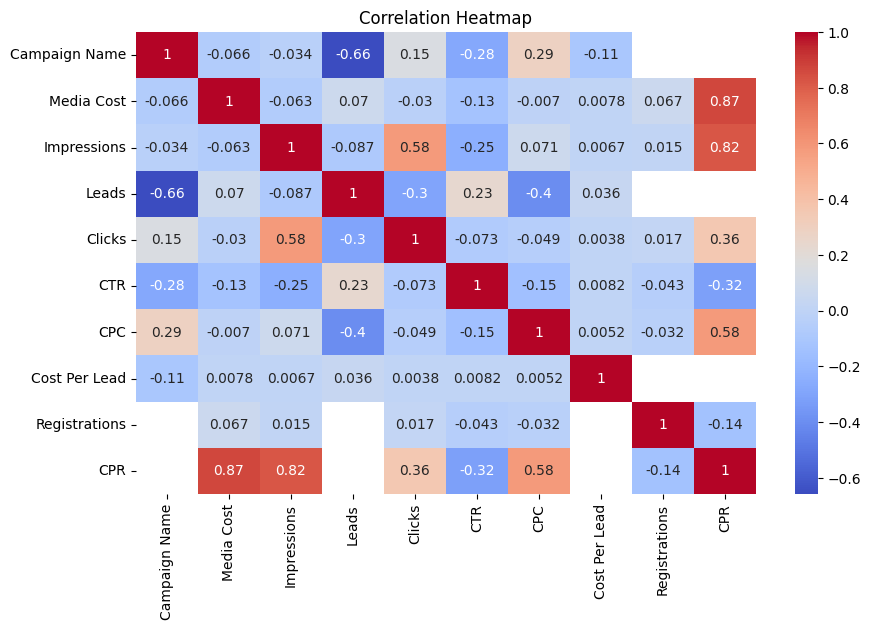

In [39]:
# Select only numeric columns for correlation
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
corr_matrix = data_cleaned[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [40]:
print(corr_matrix)

               Campaign Name  Media Cost  Impressions     Leads    Clicks  \
Campaign Name       1.000000   -0.065946    -0.033935 -0.658361  0.149543   
Media Cost         -0.065946    1.000000    -0.062617  0.070080 -0.029568   
Impressions        -0.033935   -0.062617     1.000000 -0.086980  0.582690   
Leads              -0.658361    0.070080    -0.086980  1.000000 -0.301699   
Clicks              0.149543   -0.029568     0.582690 -0.301699  1.000000   
CTR                -0.277869   -0.133225    -0.248228  0.233731 -0.072698   
CPC                 0.292195   -0.006968     0.070720 -0.404117 -0.049295   
Cost Per Lead      -0.106260    0.007815     0.006664  0.035734  0.003768   
Registrations            NaN    0.066986     0.014751       NaN  0.017140   
CPR                      NaN    0.866215     0.821832       NaN  0.356029   

                    CTR       CPC  Cost Per Lead  Registrations       CPR  
Campaign Name -0.277869  0.292195      -0.106260            NaN       NaN  


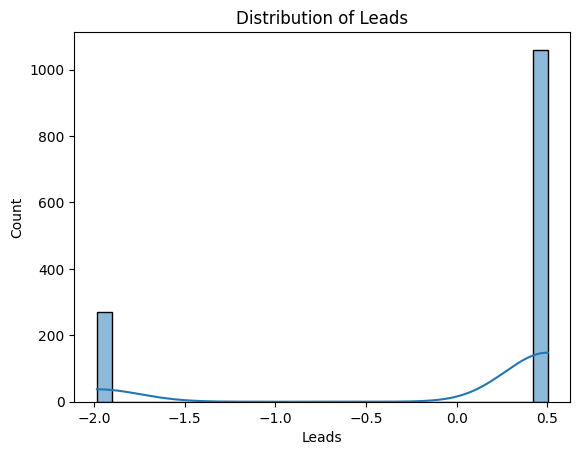

In [16]:
sns.histplot(data_cleaned['Leads'], kde=True, bins=30)
plt.title("Distribution of Leads")
plt.show()


# Model Evaluation
-----------------------------------------------------------------------

## Logistic Regression

In [42]:
#  Data Preparation
# Extract features (X) and target (y) (assuming 'Cost Per Lead' as target)
X = data.drop('Cost Per Lead', axis=1)
y = data['Cost Per Lead']

# Handle missing values in the target variable
X = X[~y.isna()]
y = y.dropna()

# Create binary classification target (e.g., high or low-performing)
threshold = y.median()  # Set a threshold at the median
y_class = (y >= threshold).astype(int)  # 1 for high-performing, 0 for low-performing

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_class, X_val_class, y_train_class, y_val_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

#  Convert the 'Date' column to timestamp (numeric format)
if 'Date' in X_train.columns:
    X_train['Date'] = pd.to_datetime(X_train['Date'])
    X_train['Date'] = X_train['Date'].apply(lambda x: x.timestamp())

    X_val['Date'] = pd.to_datetime(X_val['Date'])
    X_val['Date'] = X_val['Date'].apply(lambda x: x.timestamp())

#  Separate numeric columns for scaling (excluding non-numeric columns)
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_val_numeric = X_val.select_dtypes(include=[np.number])

#  Impute missing values and scale numeric features
imputer = SimpleImputer(strategy='mean')
X_train_numeric_imputed = imputer.fit_transform(X_train_numeric)
X_val_numeric_imputed = imputer.transform(X_val_numeric)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric_imputed)
X_val_scaled = scaler.transform(X_val_numeric_imputed)

#  Train Linear Regression Model (Baseline)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_scaled, y_train)

# Predict and evaluate Linear Regression model
y_train_pred = lin_reg_model.predict(X_train_scaled)
y_val_pred = lin_reg_model.predict(X_val_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

print(f"Linear Regression Training MSE: {train_mse}")
print(f"Linear Regression Validation MSE: {val_mse}")



Linear Regression Training MSE: 0.7747717381477202
Linear Regression Validation MSE: 0.5928100584258267


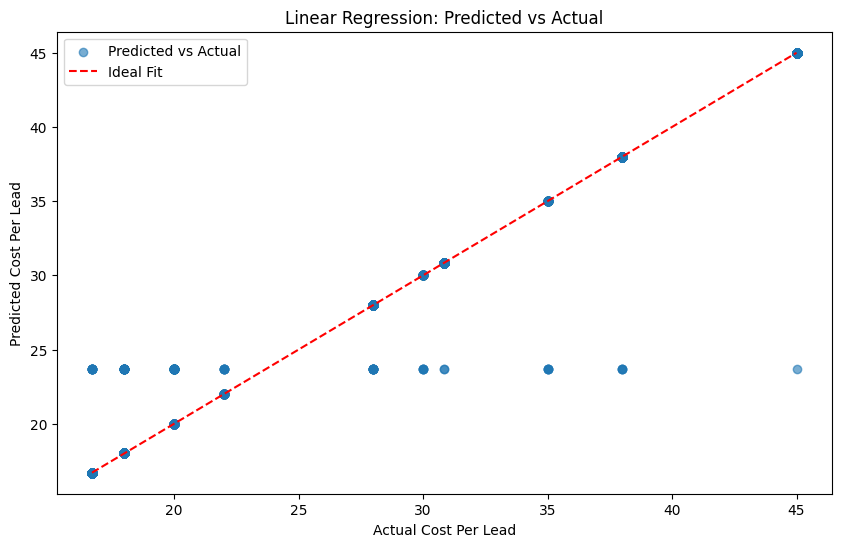

In [22]:
# Visualization for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Cost Per Lead")
plt.ylabel("Predicted Cost Per Lead")
plt.title("Linear Regression: Predicted vs Actual")
plt.legend()
plt.show()



In [24]:
# Train Logistic Regression for Classification
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train_class)

# Predict and evaluate Logistic Regression model
y_val_class_pred = log_reg_model.predict(X_val_scaled)
y_val_class_proba = log_reg_model.predict_proba(X_val_scaled)[:, 1]  # Probability for class 1

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_val_class, y_val_class_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_val_class, y_val_class_pred))

Confusion Matrix:
[[3246    0]
 [  29 4031]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3246
           1       1.00      0.99      1.00      4060

    accuracy                           1.00      7306
   macro avg       1.00      1.00      1.00      7306
weighted avg       1.00      1.00      1.00      7306



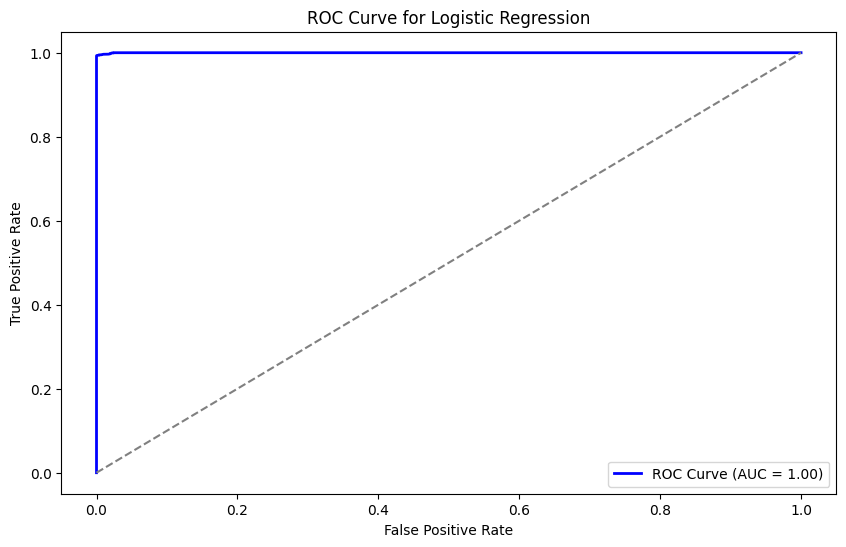

In [25]:
# ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_val_class, y_val_class_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()

In [26]:
# Classify and Output High/Low-Performing Examples
output_df = X_val.copy()
output_df['Actual'] = y_val
output_df['Predicted'] = y_val_pred
output_df['Class'] = np.where(y_val_pred >= threshold, 'High-Performing', 'Low-Performing')

print("\nSample Output (High/Low Performing Classification):")
print(output_df[['Actual', 'Predicted', 'Class']].head(10))



Sample Output (High/Low Performing Classification):
       Actual  Predicted            Class
13747   18.00  18.003641   Low-Performing
29555   28.00  27.994937   Low-Performing
16114   16.70  16.698909   Low-Performing
19579   16.70  16.698909   Low-Performing
8270    16.70  16.698909   Low-Performing
32602   20.00  19.995383   Low-Performing
7425    38.00  38.002099  High-Performing
18902   30.83  30.831152  High-Performing
34335   28.00  27.999714   Low-Performing
31604   16.70  16.698909   Low-Performing


## Random Forest

In [43]:
#  Data Preparation
# Extract features (X) and target (y) (assuming 'Cost Per Lead' as target)
X = data.drop('Cost Per Lead', axis=1)
y = data['Cost Per Lead']

# Handle missing values in y (target variable)
y = y.dropna()  # Drop rows with NaN values in y

# Ensure X has the same index as y after dropping NaN rows from y
X = X.loc[y.index]

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#  Convert the 'Date' column to timestamp (numeric format)
if 'Date' in X_train.columns:
    X_train['Date'] = pd.to_datetime(X_train['Date'])
    X_train['Date'] = X_train['Date'].apply(lambda x: x.timestamp())  # Convert to timestamp

    X_val['Date'] = pd.to_datetime(X_val['Date'])
    X_val['Date'] = X_val['Date'].apply(lambda x: x.timestamp())  # Convert to timestamp

#  Separate the numeric columns for scaling (excluding non-numeric columns)
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_val_numeric = X_val.select_dtypes(include=[np.number])

#  Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_val_scaled = scaler.transform(X_val_numeric)

#  Initialize and train Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

#  Predict and evaluate Random Forest model
y_train_pred = rf_model.predict(X_train_scaled)
y_val_pred = rf_model.predict(X_val_scaled)

#  Calculate Mean Squared Error (MSE) for both training and validation sets
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

print(f"Random Forest Training MSE: {train_mse}")
print(f"Random Forest Validation MSE: {val_mse}")


Random Forest Training MSE: 0.503865188431544
Random Forest Validation MSE: 0.4173894401588403


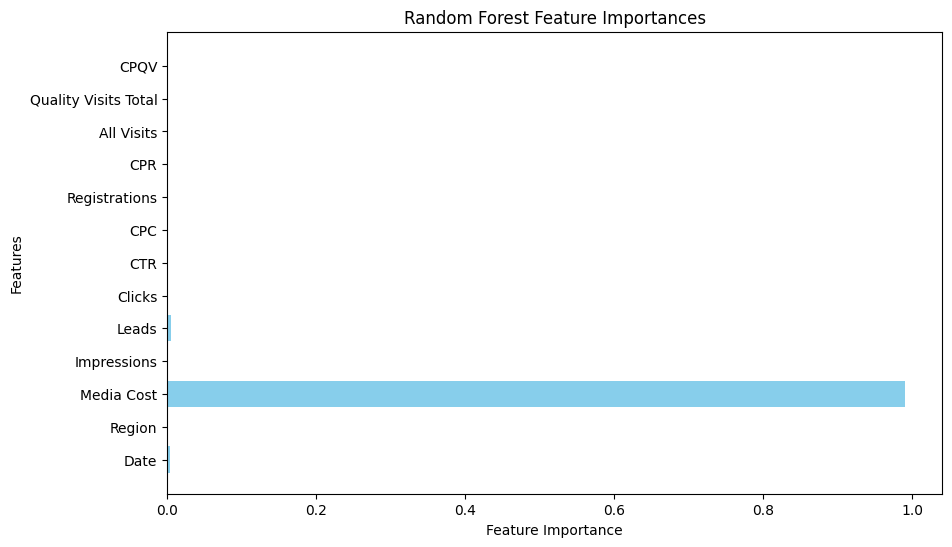

In [29]:
#  Visualize Feature Importances
feature_importances = rf_model.feature_importances_
feature_names = X_train_numeric.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importances")
plt.show()


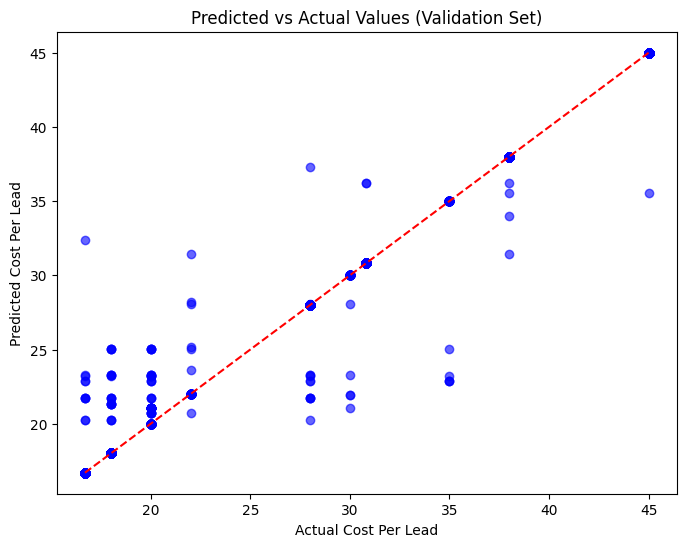

In [30]:
#  Plot Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # Perfect prediction line
plt.xlabel("Actual Cost Per Lead")
plt.ylabel("Predicted Cost Per Lead")
plt.title("Predicted vs Actual Values (Validation Set)")
plt.show()

In [31]:
# Classify Targets as High or Low Performing
# Define a threshold for high/low performance (e.g., median of target values)
threshold = y.median()

# Convert regression predictions to classifications
y_val_class = (y_val > threshold).astype(int)  # Actual classes
y_val_pred_class = (y_val_pred > threshold).astype(int)  # Predicted classes

# Evaluate classification performance
classification_acc = accuracy_score(y_val_class, y_val_pred_class)
print(f"Classification Accuracy: {classification_acc}\n")
print("Classification Report:")
print(classification_report(y_val_class, y_val_pred_class, target_names=["Low Performing", "High Performing"]))


Classification Accuracy: 0.9979468929646865

Classification Report:
                 precision    recall  f1-score   support

 Low Performing       1.00      1.00      1.00      5606
High Performing       1.00      0.99      1.00      1700

       accuracy                           1.00      7306
      macro avg       1.00      1.00      1.00      7306
   weighted avg       1.00      1.00      1.00      7306



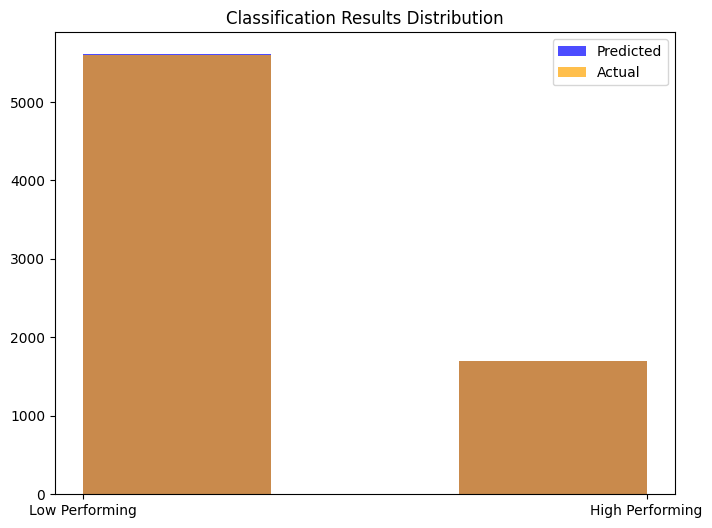

In [32]:
# Visualize Classification Results
plt.figure(figsize=(8, 6))
plt.hist(y_val_pred_class, bins=3, alpha=0.7, label='Predicted', color='blue')
plt.hist(y_val_class, bins=3, alpha=0.7, label='Actual', color='orange')
plt.xticks([0, 1], ["Low Performing", "High Performing"])
plt.legend()
plt.title("Classification Results Distribution")
plt.show()


## XGBoost

In [19]:
# Data Preparation
# Extract features (X) and target (y) (assuming 'Cost Per Lead' as target)
X = data.drop('Cost Per Lead', axis=1)
y = data['Cost Per Lead']

# Handle missing values in y (target variable)
y = y.dropna()  # Drop rows with NaN values in y

# Ensure X has the same index as y after dropping NaN rows from y
X = X.loc[y.index]

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the 'Date' column to timestamp (numeric format)
if 'Date' in X_train.columns:
    X_train['Date'] = pd.to_datetime(X_train['Date'])
    X_train['Date'] = X_train['Date'].apply(lambda x: x.timestamp())  # Convert to timestamp

    X_val['Date'] = pd.to_datetime(X_val['Date'])
    X_val['Date'] = X_val['Date'].apply(lambda x: x.timestamp())  # Convert to timestamp

# Separate the numeric columns for scaling (excluding non-numeric columns)
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_val_numeric = X_val.select_dtypes(include=[np.number])

# Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_val_scaled = scaler.transform(X_val_numeric)

# Initialize and train XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate XGBoost model
y_train_pred = xgb_model.predict(X_train_scaled)
y_val_pred = xgb_model.predict(X_val_scaled)

# Calculate Mean Squared Error (MSE) for both training and validation sets
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

print(f"XGBoost Training MSE: {train_mse}")
print(f"XGBoost Validation MSE: {val_mse}")


XGBoost Training MSE: 0.5024608581234679
XGBoost Validation MSE: 0.41685941368515456


<Figure size 1000x800 with 0 Axes>

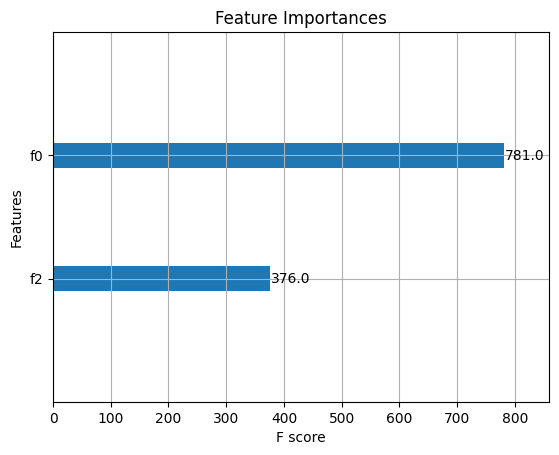

In [35]:
# Visualize Feature Importances
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='weight', title="Feature Importances")
plt.show()


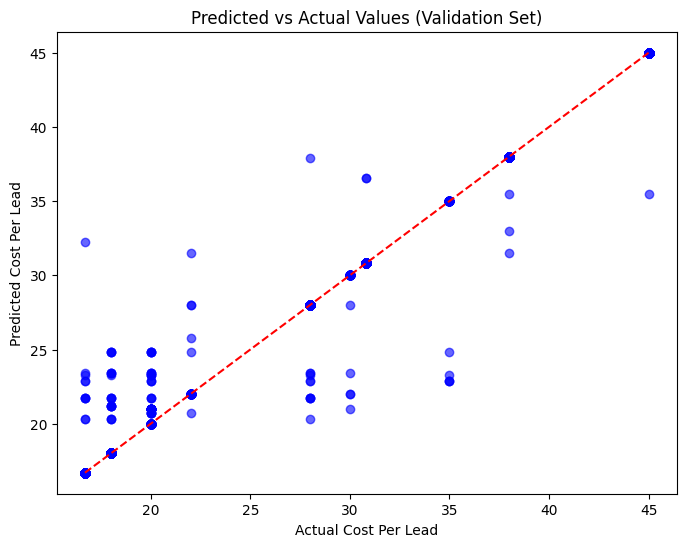

In [36]:
# Plot Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # Perfect prediction line
plt.xlabel("Actual Cost Per Lead")
plt.ylabel("Predicted Cost Per Lead")
plt.title("Predicted vs Actual Values (Validation Set)")
plt.show()



In [37]:
# Classify Targets as High or Low Performing
# Define a threshold for high/low performance (e.g., median of target values)
threshold = y.median()

# Convert regression predictions to classifications
y_val_class = (y_val > threshold).astype(int)  # Actual classes
y_val_pred_class = (y_val_pred > threshold).astype(int)  # Predicted classes

# Evaluate classification performance
classification_acc = accuracy_score(y_val_class, y_val_pred_class)
print(f"Classification Accuracy: {classification_acc}\n")
print("Classification Report:")
print(classification_report(y_val_class, y_val_pred_class, target_names=["Low Performing", "High Performing"]))

Classification Accuracy: 0.998220640569395

Classification Report:
                 precision    recall  f1-score   support

 Low Performing       1.00      1.00      1.00      5606
High Performing       1.00      0.99      1.00      1700

       accuracy                           1.00      7306
      macro avg       1.00      1.00      1.00      7306
   weighted avg       1.00      1.00      1.00      7306



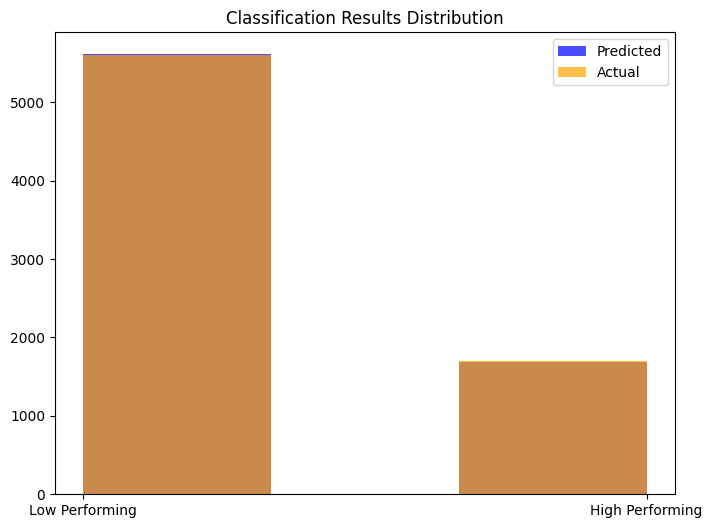

In [38]:
# Visualize Classification Results
plt.figure(figsize=(8, 6))
plt.hist(y_val_pred_class, bins=3, alpha=0.7, label='Predicted', color='blue')
plt.hist(y_val_class, bins=3, alpha=0.7, label='Actual', color='orange')
plt.xticks([0, 1], ["Low Performing", "High Performing"])
plt.legend()
plt.title("Classification Results Distribution")
plt.show()

# Model Evaluation Metrics and Visualizations

In [49]:
# Binarize the target variable (assuming a threshold value to classify high-performing vs low-performing campaigns)
threshold = y_train.median()  # Example threshold: campaigns above median cost are 'high-performing'

# Convert y_train and y_val to binary labels: 1 (high-performing) and 0 (low-performing)
y_train_binary = (y_train > threshold).astype(int)
y_val_binary = (y_val > threshold).astype(int)

# Predict the binary labels using the trained model
y_train_pred_binary = (xgb_model.predict(X_train_scaled) > threshold).astype(int)
y_val_pred_binary = (xgb_model.predict(X_val_scaled) > threshold).astype(int)

# Calculate the classification metrics for training and validation sets
train_accuracy = accuracy_score(y_train_binary, y_train_pred_binary)
val_accuracy = accuracy_score(y_val_binary, y_val_pred_binary)

train_precision = precision_score(y_train_binary, y_train_pred_binary)
val_precision = precision_score(y_val_binary, y_val_pred_binary)

train_recall = recall_score(y_train_binary, y_train_pred_binary)
val_recall = recall_score(y_val_binary, y_val_pred_binary)

train_f1 = f1_score(y_train_binary, y_train_pred_binary)
val_f1 = f1_score(y_val_binary, y_val_pred_binary)

# Calculate AUC-ROC
fpr_train, tpr_train, _ = roc_curve(y_train_binary, xgb_model.predict(X_train_scaled))
fpr_val, tpr_val, _ = roc_curve(y_val_binary, xgb_model.predict(X_val_scaled))

train_auc = auc(fpr_train, tpr_train)
val_auc = auc(fpr_val, tpr_val)

# Plot confusion matrix for training and validation sets
train_conf_matrix = confusion_matrix(y_train_binary, y_train_pred_binary)
val_conf_matrix = confusion_matrix(y_val_binary, y_val_pred_binary)

# Plotting confusion matrix
def plot_confusion_matrix(conf_matrix, title="Confusion Matrix"):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low-performing", "High-performing"], yticklabels=["Low-performing", "High-performing"])
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


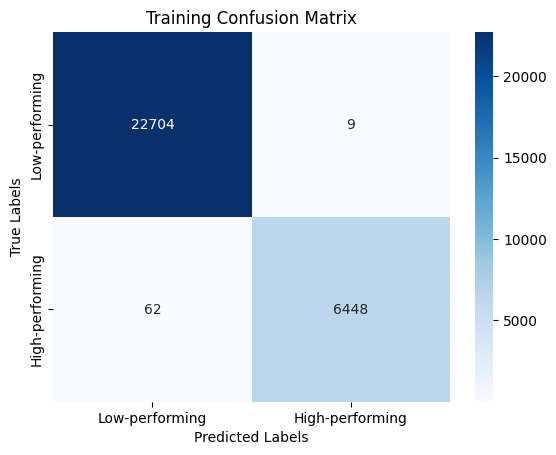

In [52]:
# Training confusion matrix
plot_confusion_matrix(train_conf_matrix, title="Training Confusion Matrix")


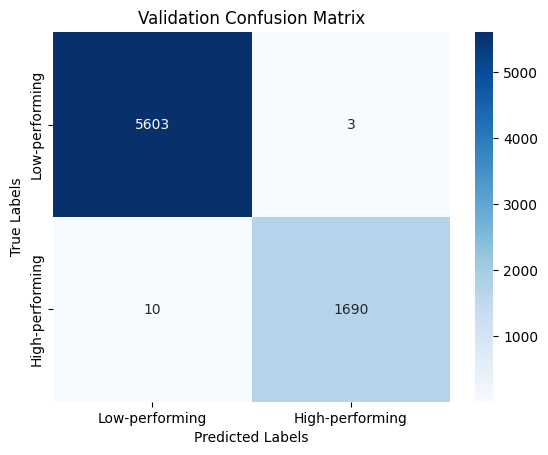

In [53]:
# Validation confusion matrix
plot_confusion_matrix(val_conf_matrix, title="Validation Confusion Matrix")


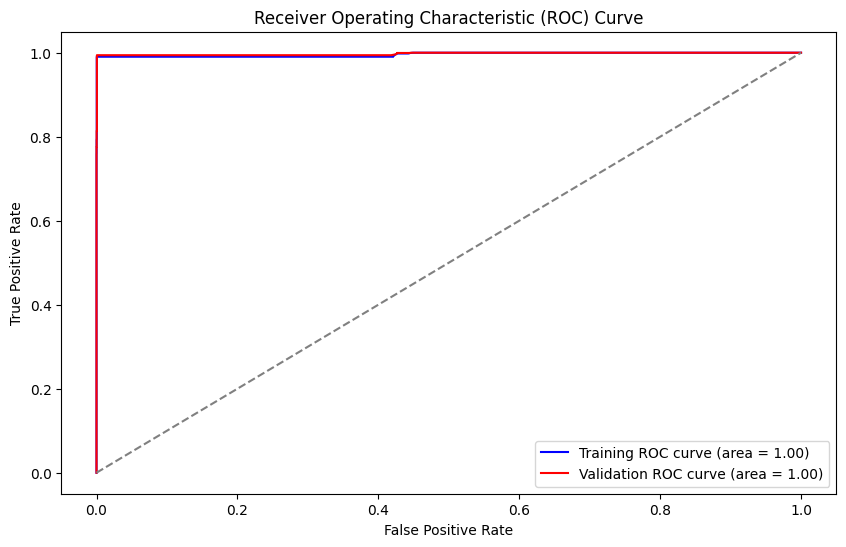

In [54]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='b', label=f'Training ROC curve (area = {train_auc:.2f})')
plt.plot(fpr_val, tpr_val, color='r', label=f'Validation ROC curve (area = {val_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [51]:
# Print out evaluation metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Training F1-Score: {train_f1:.4f}")
print(f"Validation F1-Score: {val_f1:.4f}")
print(f"Training AUC: {train_auc:.4f}")
print(f"Validation AUC: {val_auc:.4f}")


Training Accuracy: 0.9976
Validation Accuracy: 0.9982
Training Precision: 0.9986
Validation Precision: 0.9982
Training Recall: 0.9905
Validation Recall: 0.9941
Training F1-Score: 0.9945
Validation F1-Score: 0.9962
Training AUC: 0.9958
Validation AUC: 0.9974
